---------------------------------------------------
<h1>TELCO CHURN ANALYSIS</h1>
  <h6> by David Berchelmann -- March 9, 2021 </h6>
  
  ------------------------------------------------

<h3><u>We want to answer a question</u></h3>
          
</br>

<i><font color = red><h4>Why are customers churning?</h4></font></i>
</br>
   - <b>How will we go about this?</b>
        * Acquire the Data
        * Prepare 
        * Explore 
        * Evaluate
        * Create Recommendations Based On Findings </list>

--------------------------

<h2> Executive Summary </h2>

-----------------

<h5>Let's import some libaries to get started</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')


------
<h3>Time to Acquire the Data</h3>

-----

In [2]:
from acquire import get_connection, new_telco_data, get_telco_data

In [3]:
df = get_telco_data()

-------
<h5> Now that we have the data, let's analyze it so we know what we are working with and see what we will need to do to prepare it properly.</h5>

- <b>We will look at the following:</b>
    * To make sure the data was imported properly, we will look at the first few rows
    * The shape (Number of Rows, Number of Columns)
    * Information regarding data types and if we are missing data
    * We will describe the dataset (quick snapshot showing stats on columns w/ numeric data types)
    * Finally we will plot a few histograms to get a look at the distribution of some of our variables

-------

In [4]:
# Let's look at the first couple rows

df.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [5]:
# Let's analyze the shape to see how many rows and columns
df.shape

(7043, 24)

In [6]:
# Now we will look at the data types and determine if missing values appears
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

---------
<h5> One items that stands out above the information above is that our <font color = 'red'>'total_charges'</font> column is displaying a data type as 'object'. This will present issues when analyzing down the line.</h5>

  - This column will be addressed in the Prepare function, where it will be converted to a float(number) and any missing values will be addressed.
  ------

In [7]:
# Let's describe the dataset and get a look at values across our variables with numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


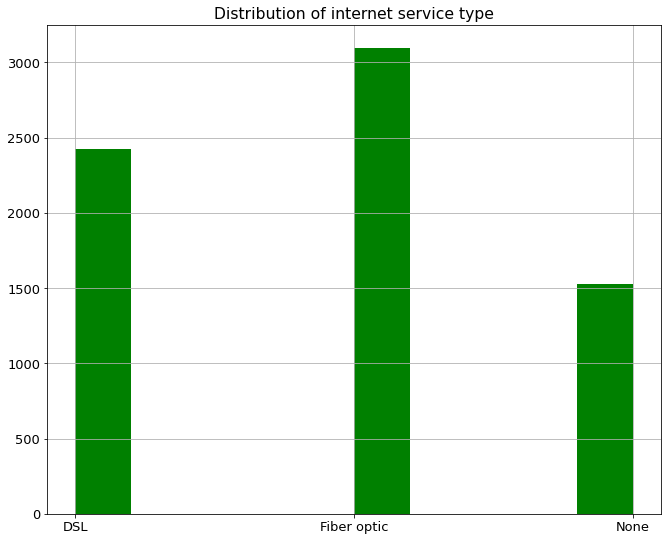

In [8]:
# I'm curious to some of our data distributions, let look at some histogram plots

df['internet_service_type'].hist(color='green')

plt.title('Distribution of internet service type')
plt.show()

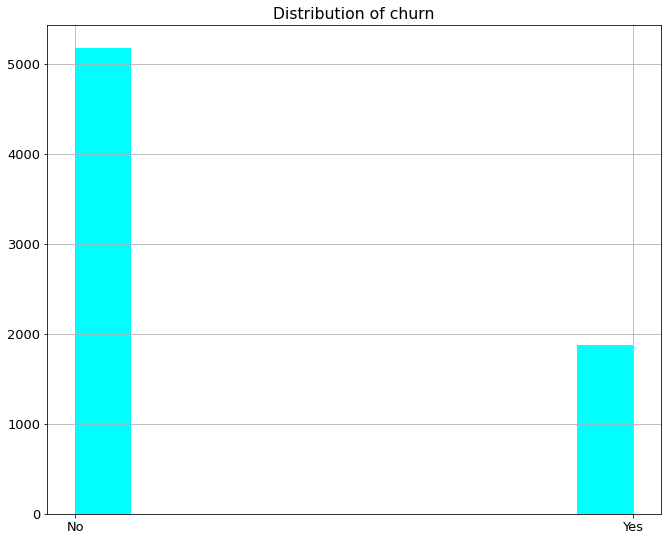

In [9]:
df['churn'].hist(color='cyan')

plt.title('Distribution of churn')
plt.show()

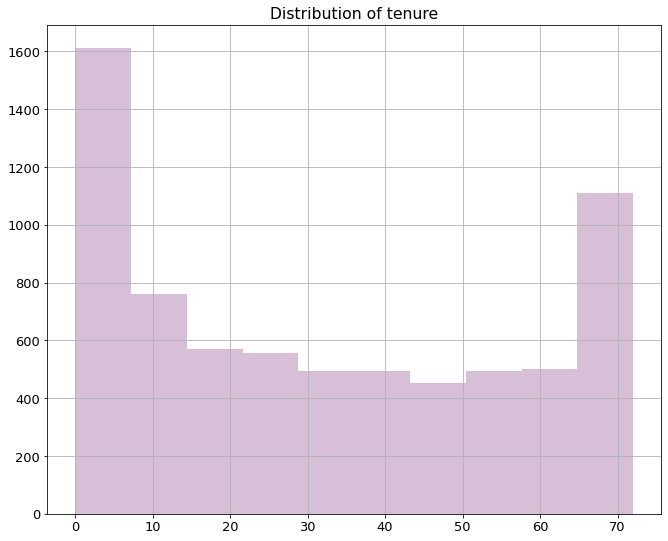

In [10]:
df['tenure'].hist(color='thistle')

plt.title('Distribution of tenure')
plt.show()

In [11]:
# I'd like to see stats for just the monthly charges & total charges columns

telco_stats = df[['monthly_charges', 'total_charges']].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


<h3>Let's Prepare the Data</h3>

In [12]:
from prepare import clean_telco, train_validate_test_split

In [13]:
df = clean_telco(df)


<h4><font color = green>Immediate Prep Analysis:</font></h4>

-------

 - The <b>total_charges</b> column had a data type of 'object' and needed to be transitioned to a float(numeric data type).
 
     - After this was completed, it was found there were 11 NaN values in this column (the only missing values in the entirety of the data-set)
     
         - Further analysis showed the reason for this was that these 11 customers were in month '0' (brand new customers) and so they had no value for total charges as they hadn't compelted an entire month of service
         
              - To fix this, it was decided to fill those missing values with 0.
             
                   - These features of these customers did not appear to be drivers of churn and would not affect the modeling.
-------

- The next issue was combining like columns (this was done within the clean_telco function:
    - Combined columns now consists of:
    
      <font color = blue> - Partner & Dependents </font> --  <i>new column name</i> = <b> no_pd</b>
        
       <font color = blue> - Phone_service & Multiple_lines</font> -- <i>new column name</i>  = <b> phone_lines</b>
        
        <font color = blue>- Streaming_tv & Streaming_movies</font> -- <i>new column name</i>  = <b> stream_tv_mov</b>
        
        <font color = blue>- Online_security & Online_backup </font> -- <i>new column name</i>  = <b> online_sec_bkup</b>
------

<h4><font color = green> Other Actions Taken During Prep</font></h4>

-------

- Created a new column called <b>average_charges</b> that is derived by total_charges/tenure

- Renamed most columns to allow for easier readability

- Encoded the four newly formed combo columns from boolean values to a '1' '0' format. 1 = True, 0 = False

- Created dummy columns of all categorical columns to allow for upcoming data exploration

- Encoded the 'churn' column from Yes/No to '1' '0' format. 1 = Yes <i>churned</i> 0 = No <i> not churned</i>

------

In [14]:
df.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,average_charges,no_partner_depend,phone_lines,stream_tv_mov,...,monthly_contract,one_yr_contract,two_yr_contract,has_dsl,has_fiber_optic,no_internet,pmt_bank transfer,pmt_cc,pmt_electronic_check,pmt_mailed_check
0,0003-MKNFE,0,9,59.9,542.40,0,60.27,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0013-MHZWF,0,9,69.4,571.45,0,63.49,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,0015-UOCOJ,1,7,48.2,340.35,0,48.62,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0023-HGHWL,1,1,25.1,25.10,1,25.10,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0032-PGELS,0,1,30.5,30.50,1,30.50,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   senior_citizen            7043 non-null   int64  
 2   tenure                    7043 non-null   int64  
 3   monthly_charges           7043 non-null   float64
 4   total_charges             7043 non-null   float64
 5   churn                     7043 non-null   int64  
 6   average_charges           7043 non-null   float64
 7   no_partner_depend         7043 non-null   int64  
 8   phone_lines               7043 non-null   int64  
 9   stream_tv_mov             7043 non-null   int64  
 10  online_sec_bkup           7043 non-null   int64  
 11  female                    7043 non-null   uint8  
 12  male                      7043 non-null   uint8  
 13  no_partner                7043 non-null   uint8  
 14  has_part

In [16]:
import explore

plt.rcParams['figure.figsize'] = (4, 2)

In [17]:
train, validate, test = train_validate_test_split(df, seed=123)

In [18]:
print(train.shape, validate.shape, test.shape)

(3943, 35) (1691, 35) (1409, 35)


<h3>We Are Now Ready to Explore & Analyze</h3>

<h3>Takeaways & Actions</h3>

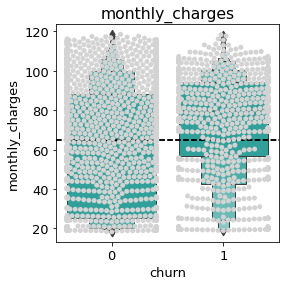

        count       mean        std    min      25%    50%    75%     max
churn                                                                    
0      2897.0  61.413997  30.890138  18.25  25.1500  64.60  88.40  118.60
1      1046.0  74.266444  24.823691  18.85  56.6625  79.65  94.25  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1156450.0, pvalue=6.206014591716352e-30)

____________________

total_charges 
____________________



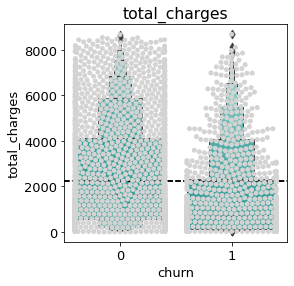

        count         mean          std    min       25%       50%       75%  \
churn                                                                          
0      2897.0  2518.846634  2324.718351   0.00  562.7000  1615.100  4144.900   
1      1046.0  1532.741205  1904.635962  18.85  114.5625   712.925  2319.125   

          max  
churn          
0      8670.1  
1      8684.8   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1963969.0, pvalue=6.658335647991753e-46)

____________________



<h3>Modeling & Evaluation Happens Now</h3>

<h3>Key Takeaways, Recommendations, & Next Steps</h3>